# Detect Blur

---
### Imports and Helper-functions

In [1]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [22]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem", "Cheetahs", "Lions", "chinese_art", "course_img"])
IMG_PATH   

'../../res/img/self/pferd-2.jpg'

---
### Loading data

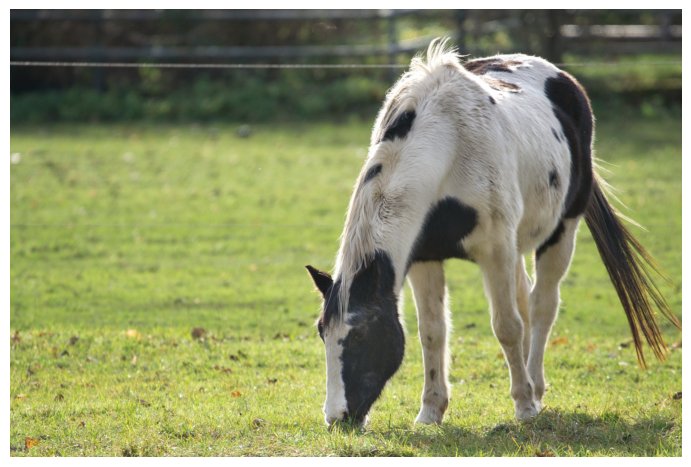

(4000, 6000, 3)

In [23]:
img = cv2.imread(IMG_PATH)
imshow(img, size=13)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

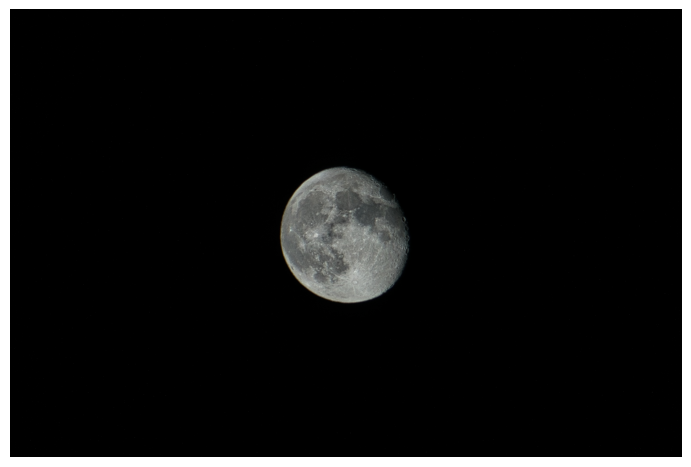

(1589, 2384, 3)

In [29]:
img_2 = cv2.imread(get_random_img_path(skip=["flickr", "weather", "gem", "Cheetahs", "Lions", "chinese_art", "course_img"]))
imshow(img_2, size=13)

gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

img_2.shape

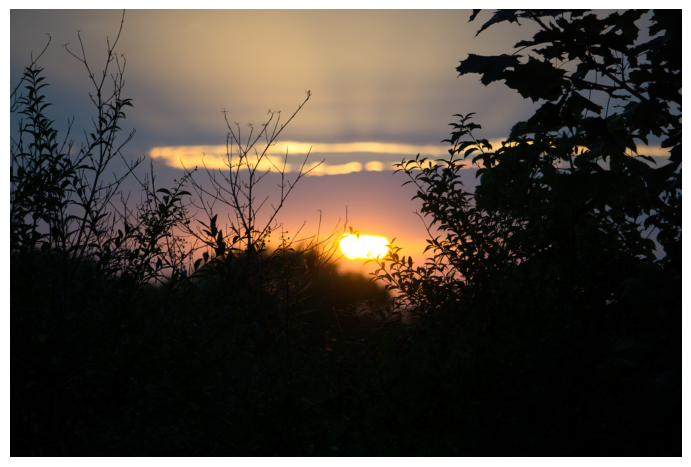

(4000, 6000, 3)

In [28]:
img_3 = cv2.imread(get_random_img_path(skip=["flickr", "weather", "gem", "Cheetahs", "Lions", "chinese_art", "course_img"]))
imshow(img_3, size=13)

gray_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)

img_3.shape

---
### Detect Blur

**To Detect Blur, we simply Convolve with the Laplacian kernel.**

We take the grayscale of an image can then convolve it with the Laplacian kernel (3 x 3 kernel):

To quantify blur, we then take the variance of the response output.

The Laplacian is the 2nd derivative of an image and thus it highlights the areas of an image containing rapid intensity changes. Hence it's use in Edge Detection. 

A high variance should in theory, indicate the presence of both edge-like and non-edge like (hence the wide range of values resulting in a high variance), which is typical of a normal in-focus image. 

A low variance, thus might mean very little edges in the image meaning it might be blurred as the more blur present the less edges there are.

In [8]:
def get_blur_score(image):
  if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return cv2.Laplacian(image, cv2.CV_64F).var()

In [30]:
get_blur_score(img)

271.45919277021665

In [31]:
get_blur_score(img_2)

87.94638817269332

In [32]:
get_blur_score(img_3)

52.59917537404678

First 2 rsults are kinda correct, but the last one has also many blur. Mixed Result

---